## Лингвистические переменные

Объект исследования - пользовательское мнение о стоимости персонального компьютера.  Доступны три значения: дешёвый, средней цены, дорогой. Цены в тысячах рублей, только за системный блок, включая цену корпуса.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv( 'computerPriceData.csv', delimiter = ';', encoding="cp1251" )

In [3]:
data

,cheap_start,cheap_end,middle_start,middle_end,expensive_start,expensive_end
0,0,30000,25000,60000,55000,150000
1,0,40000,35000,70000,65000,150000
2,0,32000,27000,50000,47000,150000
3,0,34000,28000,65000,60000,150000
4,0,38000,30000,80000,70000,150000
5,0,39000,34000,55000,50000,150000


In [4]:
def getRate (data, name, price):
    dataSize = data.shape[0]
    summ = 0
    for i in range(0, dataSize):
        if ((data.loc[i][name + "_start"] <= price) and (price <= data.loc[i][name + "_end"])):
            summ += 1
    return summ / dataSize
            

In [5]:
result = [[], [], []]
index = 0
for name in ("cheap", "middle", "expensive"):
    min = data["cheap_start"].min()
    max = data["expensive_end"].max() + 1000
    for price in range(min, max, 1000):
        result[index].append(getRate(data, name, price))
    index += 1
    

In [6]:
resultTuples = [tuple(l) for l in result]

In [7]:
d = {'cheap': result[0], 'middle':  result[1], 'expensive':  result[2]}
df = pd.DataFrame(data=d)

In [8]:
import warnings
warnings.simplefilter('ignore')
%pylab inline
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

Populating the interactive namespace from numpy and matplotlib


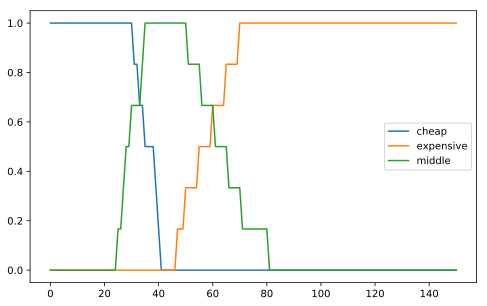

In [9]:
df.plot();

cheap - z-function, middle - pi-function, expensive - s-function